<a href="https://colab.research.google.com/github/cardstud/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/tdu1s2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 2

## Data Wrangling and Storytelling

Taming data from its raw form into informative insights and stories.

## Data Wrangling

In this Sprint Challenge you will first "wrangle" some data from [Gapminder](https://www.gapminder.org/about-gapminder/), a Swedish non-profit co-founded by Hans Rosling. "Gapminder produces free teaching resources making the world understandable based on reliable statistics."
- [Cell phones (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv)
- [Population (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Geo country codes](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/ddf--entities--geo--country.csv)

These two links have everything you need to successfully complete the first part of this sprint challenge.
- [Pandas documentation: Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html) (one question)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) (everything else)

### Part 0. Load data

You don't need to add or change anything here. Just run this cell and it loads the data for you, into three dataframes.

In [0]:
import pandas as pd

cell_phones = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv')

population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

geo_country_codes = (pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
                       .rename(columns={'country': 'geo', 'name': 'country'}))

### Part 1. Join data

First, join the `cell_phones` and `population` dataframes (with an inner join on `geo` and `time`).

The resulting dataframe's shape should be: (8590, 4)

In [0]:
df = pd.merge(cell_phones, population, how='inner')

In [0]:
df.shape

(8590, 4)

Then, select the `geo` and `country` columns from the `geo_country_codes` dataframe, and join with your population and cell phone data.

The resulting dataframe's shape should be: (8590, 5)

In [0]:
df = pd.merge(geo_country_codes[['geo', 'country']], df)

In [0]:
df.shape

(8590, 5)

### Part 2. Make features

Calculate the number of cell phones per person, and add this column onto your dataframe.

(You've calculated correctly if you get 1.220 cell phones per person in the United States in 2017.)

In [0]:
df.head()

,geo,country,time,cell_phones_total,population_total
0,afg,Afghanistan,1960,0.0,8996351
1,afg,Afghanistan,1965,0.0,9938414
2,afg,Afghanistan,1970,0.0,11126123
3,afg,Afghanistan,1975,0.0,12590286
4,afg,Afghanistan,1976,0.0,12840299


In [0]:
df[df['country'] == 'United States']

,geo,country,time,cell_phones_total,population_total
8092,usa,United States,1960,0.0,186808228
8093,usa,United States,1965,0.0,199815540
8094,usa,United States,1970,0.0,209588150
8095,usa,United States,1975,0.0,219205296
8096,usa,United States,1976,0.0,221239215
8097,usa,United States,1977,0.0,223324042
8098,usa,United States,1978,0.0,225449657
8099,usa,United States,1979,0.0,227599878
8100,usa,United States,1980,0.0,229763052
8101,usa,United States,1984,91600.0,238573861


In [0]:
df.dtypes

geo                   object
country               object
time                   int64
cell_phones_total    float64
population_total       int64
dtype: object

In [0]:
df['cell_phones_total'].value_counts().sum()

8590

In [0]:
condition = (df['country'] == 'United States') & (df['time'] == 2017)
columns = ['country', 'time', 'cell_phones_total', 'population_total']
subset = df[condition][columns]

In [0]:
subset.shape

(1, 4)

In [0]:
subset.head()

,country,time,cell_phones_total,population_total
8134,United States,2017,395881000.0,324459463


In [0]:
value = subset['cell_phones_total'] / subset['population_total']

In [0]:
value

8134    1.220125
dtype: float64

Modify the `geo` column to make the geo codes uppercase instead of lowercase.

In [0]:
df.head(1)

,geo,country,time,cell_phones_total,population_total
0,afg,Afghanistan,1960,0.0,8996351


In [0]:
df['geo'] = df['geo'].str.upper()

In [0]:
df.head()

,geo,country,time,cell_phones_total,population_total
0,AFG,Afghanistan,1960,0.0,8996351
1,AFG,Afghanistan,1965,0.0,9938414
2,AFG,Afghanistan,1970,0.0,11126123
3,AFG,Afghanistan,1975,0.0,12590286
4,AFG,Afghanistan,1976,0.0,12840299


### Part 3. Process data

Use the describe function, to describe your dataframe's numeric columns, and then its non-numeric columns.

(You'll see the time period ranges from 1960 to 2017, and there are 195 unique countries represented.)

In [0]:
# numeric columns
df.describe()

,time,cell_phones_total,population_total
count,8590.000000,8.590000e+03,8.590000e+03
mean,1994.193481,9.004950e+06,2.983823e+07
std,14.257975,5.573408e+07,1.161284e+08
min,1960.000000,0.000000e+00,4.433000e+03
25%,1983.000000,0.000000e+00,1.456148e+06
50%,1995.000000,6.200000e+03,5.725062e+06
75%,2006.000000,1.697652e+06,1.810581e+07
max,2017.000000,1.474097e+09,1.409517e+09


In [0]:
# non-numeric columns
df.describe(exclude='number')

,geo,country
count,8590,8590
unique,195,195
top,JPN,Haiti
freq,46,46


In 2017, what were the top 5 countries with the most cell phones total?

Your list of countries should have these totals:

| country | cell phones total |
|:-------:|:-----------------:|
|    ?    |     1,474,097,000 |
|    ?    |     1,168,902,277 |
|    ?    |       458,923,202 |
|    ?    |       395,881,000 |
|    ?    |       236,488,548 |



In [0]:
# This optional code formats float numbers with comma separators
pd.options.display.float_format = '{:,}'.format

In [0]:
condition = (df['time'] == 2017)
columns = ['country', 'cell_phones_total']
subset = df[condition][columns]

In [0]:
subset.head()

,country,cell_phones_total
45,Afghanistan,"23,929,713.0"
91,Angola,"13,323,952.0"
137,Albania,"3,497,950.0"
183,Andorra,"80,337.0"
219,United Arab Emirates,"19,826,224.0"


In [0]:
subset = subset.sort_values(by=['cell_phones_total'], ascending=False)

In [0]:
subset.head(5)

,country,cell_phones_total
1496,China,"1,474,097,000.0"
3595,India,"1,168,902,277.0"
3549,Indonesia,"458,923,202.0"
8134,United States,"395,881,000.0"
1084,Brazil,"236,488,548.0"


2017 was the first year that China had more cell phones than people.

What was the first year that the USA had more cell phones than people?

In [0]:
condition = (df['country'] == 'United States') 
columns = ['time', 'country', 'cell_phones_total', 'population_total']
subset1 = df[condition][columns]

In [0]:
subset1.sort_values(by='time', ascending=False).head(5)

,time,country,cell_phones_total,population_total
8134,2017,United States,"395,881,000.0",324459463
8133,2016,United States,"395,881,000.0",322179605
8132,2015,United States,"382,307,000.0",319929162
8131,2014,United States,"355,500,000.0",317718779
8130,2013,United States,"310,698,000.0",315536676


In [0]:
# The year that USA had more cell phones than people is in 2014 when cell_phones_total = 355,500,000 vs population_total = 317,718,779

### Part 4. Reshape data

*This part is not needed to pass the sprint challenge, only to get a 3! Only work on this after completing the other sections.*

Create a pivot table:
- Columns: Years 2007—2017
- Rows: China, India, United States, Indonesia, Brazil (order doesn't matter)
- Values: Cell Phones Total

The table's shape should be: (5, 11)

In [0]:
condition = subset1['country'] == ('China', 'United States', 'Indonesia', 'Brazil')
columns = ['time', 'country', 'cell_phones_total', 'population_total']
subset2 = subset1[condition][columns]
subset2

,time,country,cell_phones_total,population_total


In [0]:
subset1.pivot_table(index='columns', columns='time', values='cell_phones_total')
# ran out of time...oh well

KeyError: ignored

Sort these 5 countries, by biggest increase in cell phones from 2007 to 2017.

Which country had 935,282,277 more cell phones in 2017 versus 2007?

If you have the time and curiosity, what other questions can you ask and answer with this data?

## Data Storytelling

In this part of the sprint challenge you'll work with a dataset from **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)**!

### Part 0 — Run this starter code

You don't need to add or change anything here. Just run this cell and it loads the data for you, into a dataframe named `df`.

(You can explore the data if you want, but it's not required to pass the Sprint Challenge.)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv'
df = pd.read_csv(url).rename(columns={'YEAR': 'Year', 'Raw_Guest_List': 'Guest'})

def get_occupation(group):
    if group in ['Acting', 'Comedy', 'Musician']:
        return 'Acting, Comedy & Music'
    elif group in ['Media', 'media']:
        return 'Media'
    elif group in ['Government', 'Politician', 'Political Aide']:
        return 'Government and Politics'
    else:
        return 'Other'
      
df['Occupation'] = df['Group'].apply(get_occupation)

### Part 1 — What's the breakdown of guests’ occupations per year?

For example, in 1999, what percentage of guests were actors, comedians, or musicians? What percentage were in the media? What percentage were in politics? What percentage were from another occupation?

Then, what about in 2000? In 2001? And so on, up through 2015.

So, **for each year of _The Daily Show_, calculate the percentage of guests from each occupation:**
- Acting, Comedy & Music
- Government and Politics
- Media
- Other

#### Hints:
You can make a crosstab. (See pandas documentation for examples, explanation, and parameters.)

You'll know you've calculated correctly when the percentage of "Acting, Comedy & Music" guests is 90.36% in 1999, and 45% in 2015.

In [0]:
df.head()

,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
0,1999,actor,1/11/99,Acting,Michael J. Fox,"Acting, Comedy & Music"
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard,"Acting, Comedy & Music"
2,1999,television actress,1/13/99,Acting,Tracey Ullman,"Acting, Comedy & Music"
3,1999,film actress,1/14/99,Acting,Gillian Anderson,"Acting, Comedy & Music"
4,1999,actor,1/18/99,Acting,David Alan Grier,"Acting, Comedy & Music"


In [0]:
df.describe()

,Year
count,"2,693.0"
mean,"2,006.8161901225399"
std,4.8281774988983575
min,"1,999.0"
25%,"2,003.0"
50%,"2,007.0"
75%,"2,011.0"
max,"2,015.0"


In [0]:
df.describe(exclude='number')

,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
count,2667,2693,2662,2693,2693
unique,398,2639,17,1669,4
top,actor,12/18/13,Acting,Fareed Zakaria,"Acting, Comedy & Music"
freq,596,3,930,19,1203


In [0]:
df1 = pd.crosstab(df['Year'], df['Occupation'], normalize='index')
df1

Occupation,"Acting, Comedy & Music",Government and Politics,Media,Other
Year,,,,
1999,0.9036144578313253,0.012048192771084338,0.06626506024096386,0.018072289156626505
2000,0.7396449704142012,0.08284023668639054,0.1242603550295858,0.05325443786982249
2001,0.7261146496815286,0.03821656050955414,0.19745222929936307,0.03821656050955414
2002,0.6226415094339622,0.06918238993710692,0.2641509433962264,0.0440251572327044
2003,0.5602409638554217,0.10240963855421686,0.2469879518072289,0.09036144578313253
2004,0.38414634146341464,0.22560975609756098,0.27439024390243905,0.11585365853658537
2005,0.37037037037037035,0.16049382716049382,0.3333333333333333,0.13580246913580246
2006,0.36024844720496896,0.19254658385093168,0.2919254658385093,0.15527950310559005
2007,0.2553191489361702,0.1702127659574468,0.3333333333333333,0.24113475177304963


### Part 2 — Recreate this explanatory visualization:

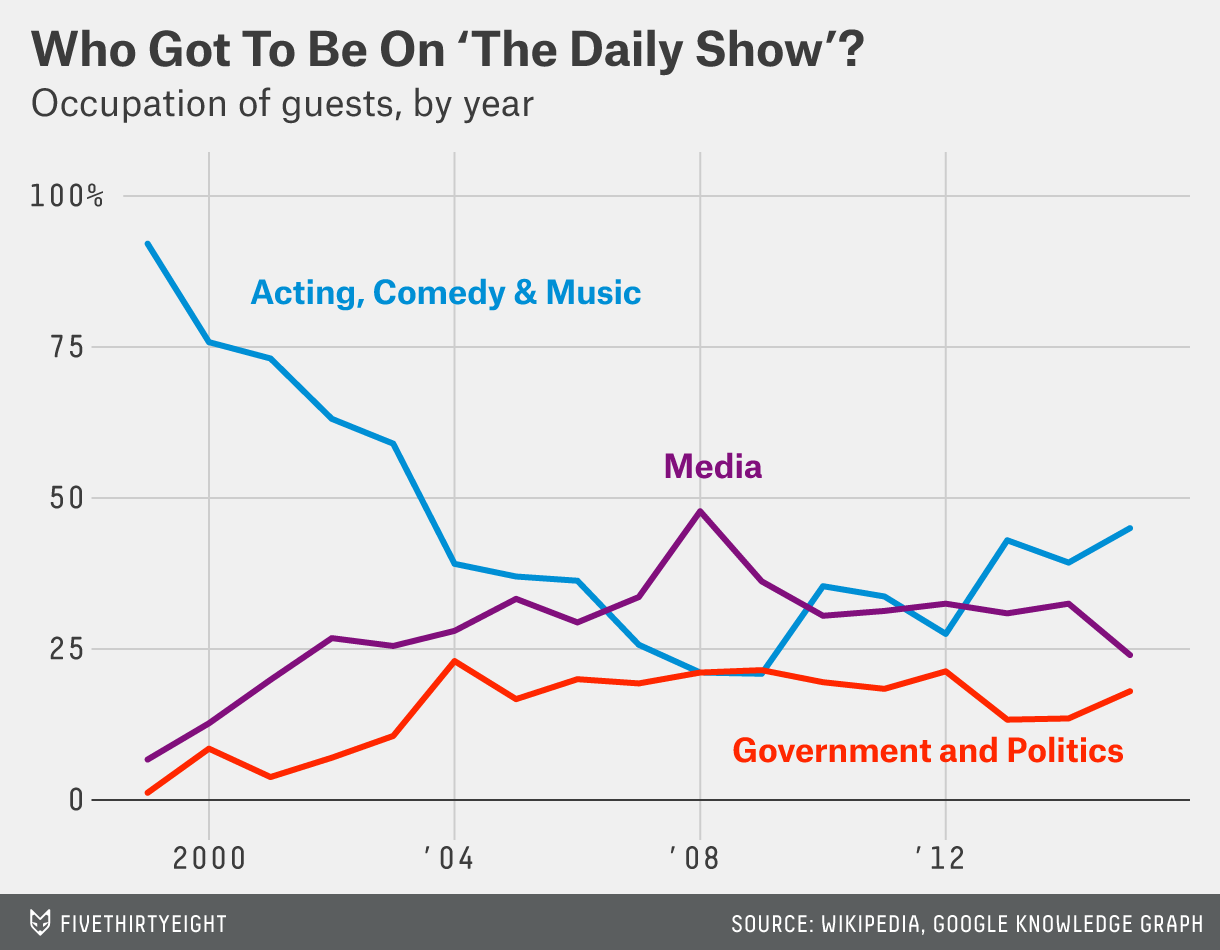

In [0]:
from IPython.display import display, Image
png = 'https://fivethirtyeight.com/wp-content/uploads/2015/08/hickey-datalab-dailyshow.png'
example = Image(png, width=500)
display(example)

**Hints:**
- You can choose any Python visualization library you want. I've verified the plot can be reproduced with matplotlib, pandas plot, or seaborn. I assume other libraries like altair or plotly would work too.
- If you choose to use seaborn, you may want to upgrade the version to 0.9.0.

**Expectations:** Your plot should include:
- 3 lines visualizing "occupation of guests, by year." The shapes of the lines should look roughly identical to 538's example. Each line should be a different color. (But you don't need to use the _same_ colors as 538.)
- Legend or labels for the lines. (But you don't need each label positioned next to its line or colored like 538.)
- Title in the upper left: _"Who Got To Be On 'The Daily Show'?"_ with more visual emphasis than the subtitle. (Bolder and/or larger font.)
- Subtitle underneath the title: _"Occupation of guests, by year"_

**Optional Bonus Challenge:**
- Give your plot polished aesthetics, with improved resemblance to the 538 example.
- Any visual element not specifically mentioned in the expectations is an optional bonus.

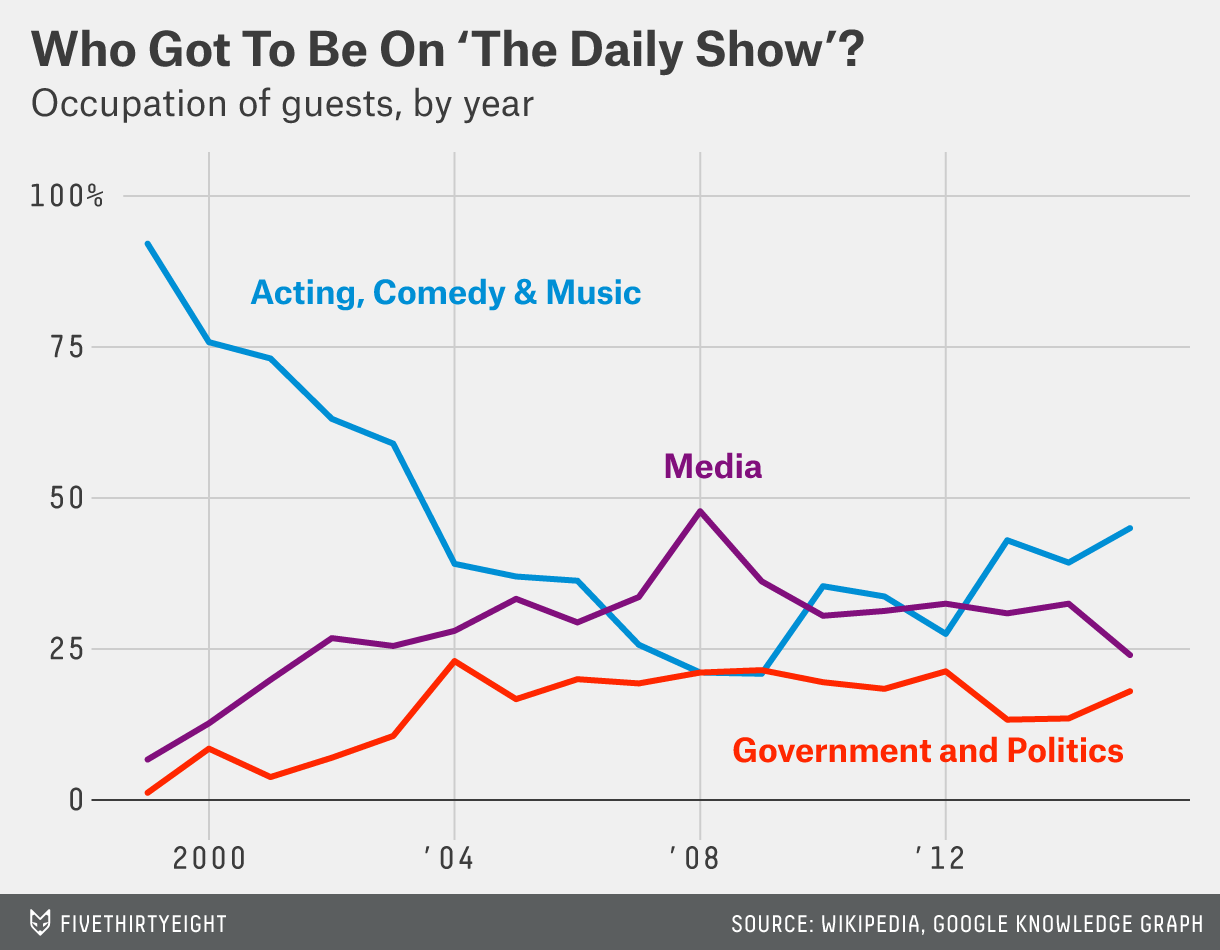

In [0]:
display(example)

In [0]:
df2 = df1.drop(['Other'], axis=1)
df2

Occupation,"Acting, Comedy & Music",Government and Politics,Media
Year,,,
1999,0.9036144578313253,0.012048192771084338,0.06626506024096386
2000,0.7396449704142012,0.08284023668639054,0.1242603550295858
2001,0.7261146496815286,0.03821656050955414,0.19745222929936307
2002,0.6226415094339622,0.06918238993710692,0.2641509433962264
2003,0.5602409638554217,0.10240963855421686,0.2469879518072289
2004,0.38414634146341464,0.22560975609756098,0.27439024390243905
2005,0.37037037037037035,0.16049382716049382,0.3333333333333333
2006,0.36024844720496896,0.19254658385093168,0.2919254658385093
2007,0.2553191489361702,0.1702127659574468,0.3333333333333333


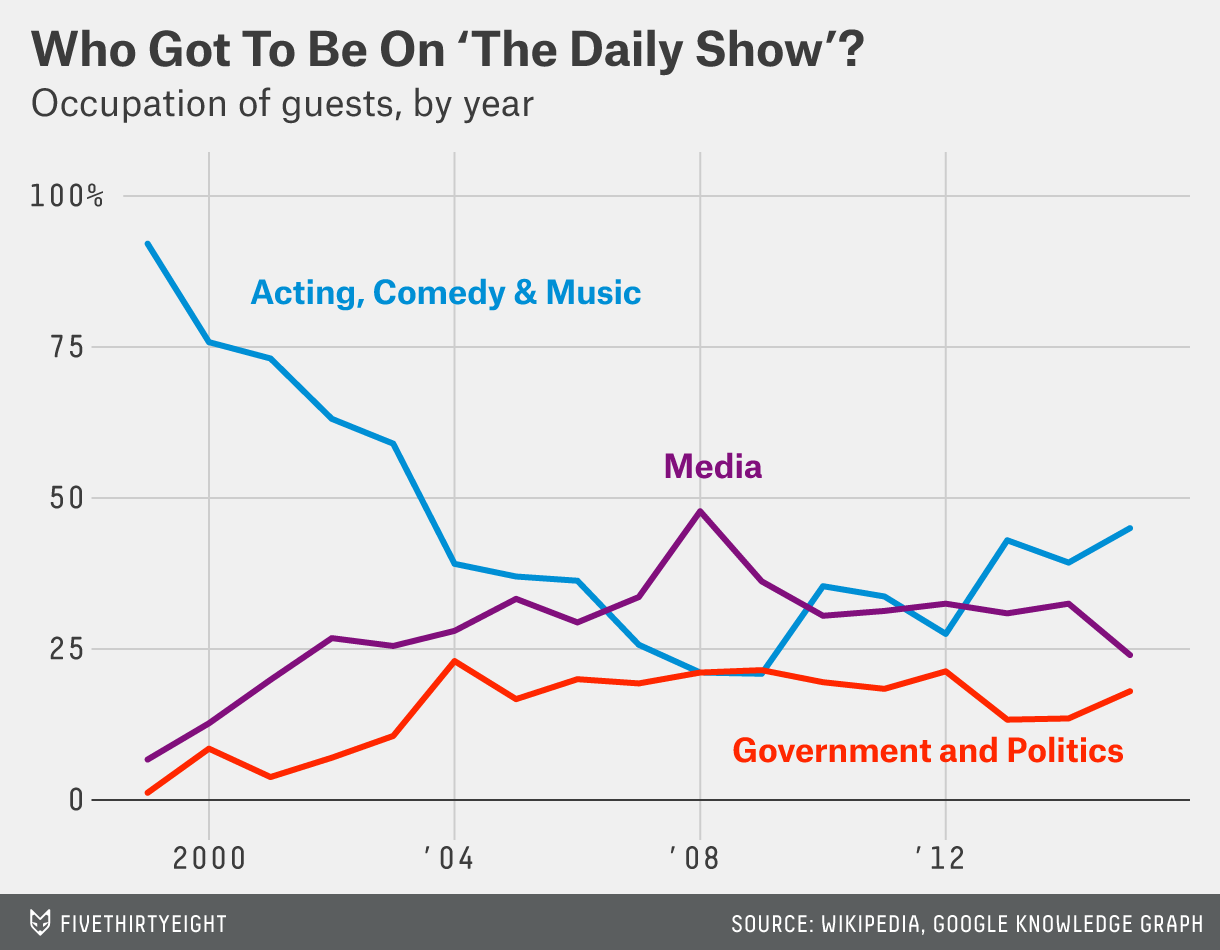

In [0]:
display(example)

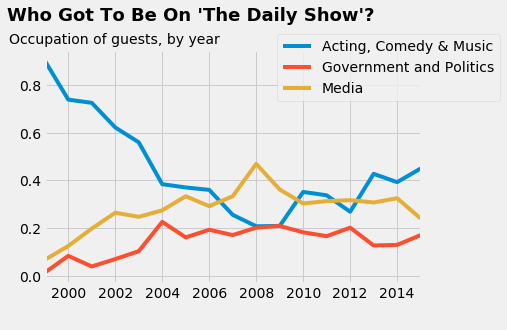

In [0]:
plt.style.use('fivethirtyeight')
yax = ['0', '25', '50', '75', '100%']
ax = df2.plot()
ax.patch.set_alpha(0.1)
plt.title("Who Got To Be On 'The Daily Show'?",
         fontsize=18,
         x=-0.1,
         y=1.1,loc='left',
         fontweight='bold');
subtitle_string = 'Occupation of guests, by year'
plt.suptitle(subtitle_string, fontsize=14, x= 0.24, y=0.94)
plt.xlabel(' ')
plt.legend(bbox_to_anchor = [0.6, 0.75]);